In [3]:
import pandas as pd
import time
import datetime


In [18]:
df = pd.read_json('anyscale-1694797594_raw.json')

In [19]:
# This is the standard analysis we would do in the real script

print('Validity results:')
print(df['valid'].value_counts())
cdf = df[df.valid !='Exception'].copy()
print(f'Clean DF is: {len(cdf)}')
cdf['total_tokens_per_s'] = (cdf.tokens_out + cdf.tokens_in)/cdf.total_time
cdf['out_tokens_per_s'] = cdf.tokens_out/(cdf.total_time-cdf.ttft)
mean_tokens_in = cdf['tokens_in'].mean() 
mean_tokens_out = cdf['tokens_out'].mean() 
mean_ttft = cdf['ttft'].mean()
gt_3_ttft = len(cdf[cdf['ttft'] > 3])/len(cdf)
print(f'Mean TTFT: {mean_ttft*1000:.0f} ms (mean tokens in: {mean_tokens_in:.0f}, out: {mean_tokens_out:.0f})')
print(f'TTFT > 3 s: {gt_3_ttft*100:.2f}%')
print(f'Mean tokens/s throughput (total in+out): {cdf.total_tokens_per_s.mean():.2f} tok/s')  
print(f'Mean tokens/s out: {cdf.out_tokens_per_s.mean():.1f} tok/s (inter-token latency: {1/cdf.out_tokens_per_s.mean()*1000:.1f} ms)')     

Validity results:
valid
OK    300
Name: count, dtype: int64
Clean DF is: 300
Mean TTFT: 563 ms (mean tokens in: 435, out: 85)
TTFT > 3 s: 0.00%
Mean tokens/s throughput (total in+out): 115.31 tok/s
Mean tokens/s out: 21.2 tok/s (inter-token latency: 47.2 ms)


In [20]:
len(cdf)

300

<Axes: xlabel='tokens_in', ylabel='ttft'>

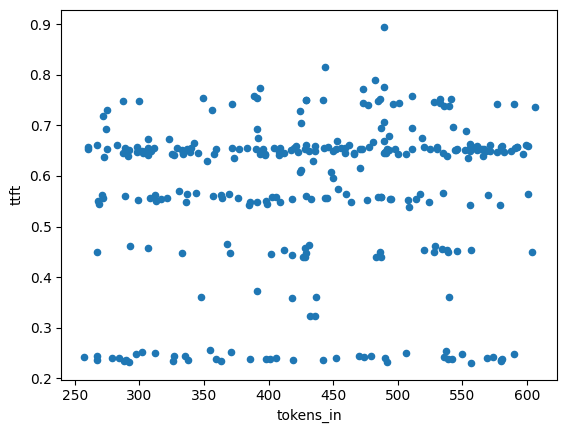

In [21]:
cdf.plot.scatter(y='ttft', x='tokens_in')

In [12]:
cdf.describe()

,ttft,total_time,tokens_in,tokens_out,total_tokens_per_s,out_tokens_per_s
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.054050,4.623993,429.380000,86.480000,114.217682,18.829032
std,0.034920,1.409166,96.842573,31.525372,24.268009,0.683738
min,0.026952,3.420823,252.000000,59.000000,51.488587,17.049936
25%,0.039786,4.246532,357.750000,79.750000,94.031070,18.450175
50%,0.048394,4.452024,428.500000,82.000000,115.040590,18.898302
75%,0.055149,4.661083,515.000000,87.000000,133.861550,19.241624
max,0.287868,18.081677,603.000000,384.000000,174.692456,21.981514


<Axes: ylabel='Frequency'>

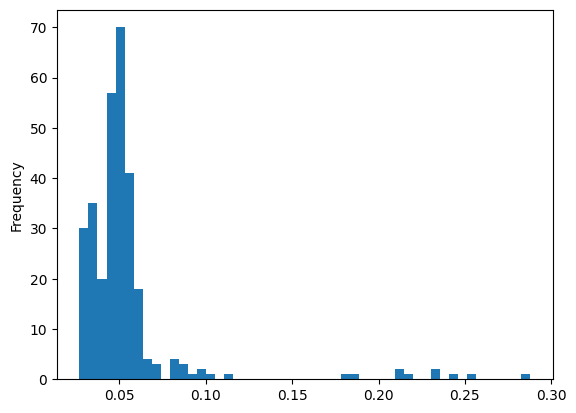

In [13]:
cdf['ttft'].plot.hist(bins=50)

In [14]:
list(df[df['valid'] == 'Exception']['cause'].to_numpy())

[]